In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


In [20]:
df = pd.read_csv(r"C:\Users\mccmrfcs\Downloads\time_series_covid19_confirmed_global.csv")

# 1. Using time_series_covid19_confirmed_global.csv, compute the daily case increases for the US from January 1, 2022, to March 31, 2022. Fit a normal distribution to these increases and visualize it with a Seaborn histogram and fitted density curve.

In [23]:
#To separate us column only from the data set
us_data = df[df['Country/Region'] == 'US']
us_data

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,2/28/2023,3/1/2023,3/2/2023,3/3/2023,3/4/2023,3/5/2023,3/6/2023,3/7/2023,3/8/2023,3/9/2023
260,NaN,US,40.0,-100.0,1,1,2,2,5,5,...,103443455,103533872,103589757,103648690,103650837,103646975,103655539,103690910,103755771,103802702


In [28]:
#to extract the date columns only
us_total = us_data.iloc[:, 4:].sum(axis=0)
us_total

1/22/2020            1
1/23/2020            1
1/24/2020            2
1/25/2020            2
1/26/2020            5
               ...    
3/5/2023     103646975
3/6/2023     103655539
3/7/2023     103690910
3/8/2023     103755771
3/9/2023     103802702
Length: 1143, dtype: int64

In [61]:
#to extract the date columns from 1/1/2022 to 31/3/2022
us_total.index = pd.to_datetime(us_total.index, format='mixed')
us_selected = us_total['2022-01-01':'2022-03-31']
us_selected

2022-01-01    55099948
2022-01-02    55396191
2022-01-03    56438983
2022-01-04    57267794
2022-01-05    57943576
                ...   
2022-03-27    80078147
2022-03-28    80115859
2022-03-29    80138918
2022-03-30    80177035
2022-03-31    80221585
Length: 90, dtype: int64

In [62]:
#to find the difference between each dates or to find the daily increases 
daily_increases = us_selected.diff().dropna()
daily_increases

2022-01-02     296243.0
2022-01-03    1042792.0
2022-01-04     828811.0
2022-01-05     675782.0
2022-01-06     844606.0
                ...    
2022-03-27      12036.0
2022-03-28      37712.0
2022-03-29      23059.0
2022-03-30      38117.0
2022-03-31      44550.0
Length: 89, dtype: float64

In [81]:
#fit a norm dist
mu, std = norm.fit(daily_increases)

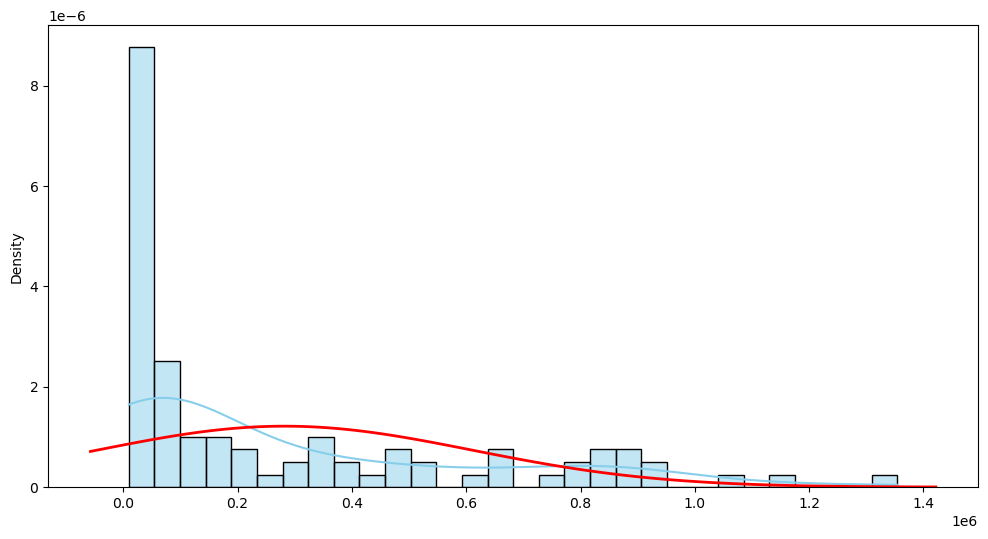

In [82]:
#plotting 
plt.figure(figsize=(12, 6))
sns.histplot(daily_increases, bins=30, kde=True, stat='density', color='skyblue', label='Daily Increases Histogram')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label=f'Fitted Normal Curve mu= {mu:.2f}, sig = {std:.2f}')

# 2. Detect outliers using the Interquartile Range (IQR) method and highlight them in a Seaborn boxplot.

In [67]:
Q1 = daily_increases.quantile(0.25)  
Q3 = daily_increases.quantile(0.75) 
IQR = Q3 - Q1

In [69]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [74]:
outliers = daily_increases[(daily_increases < lower_bound) | (daily_increases > upper_bound)]

<Axes: xlabel='None'>

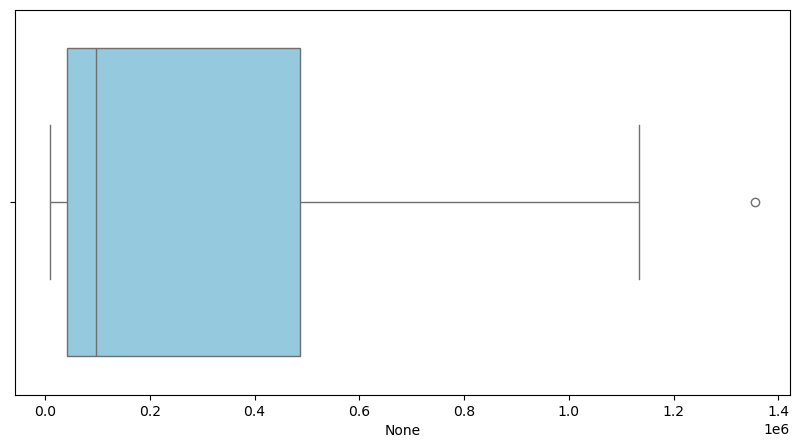

In [77]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=daily_increases , color="skyblue")

# 3. Calculate the probability that a daily increase exceeds 500,000 cases using the normal distribution. Add titles, labels, and styling to both plots. Interpret: Is the normal distribution a good fit, and how do outliers impact the analysis?


In [94]:
daily_cumulative = df.iloc[:, 4:].sum(axis=0)
daily_new_case = daily_cumulative.diff().dropna()
mu, std = norm.fit(daily_new_case)
threshold=500000
prob_over_500k= 1-norm.cdf(threshold,mu,std)

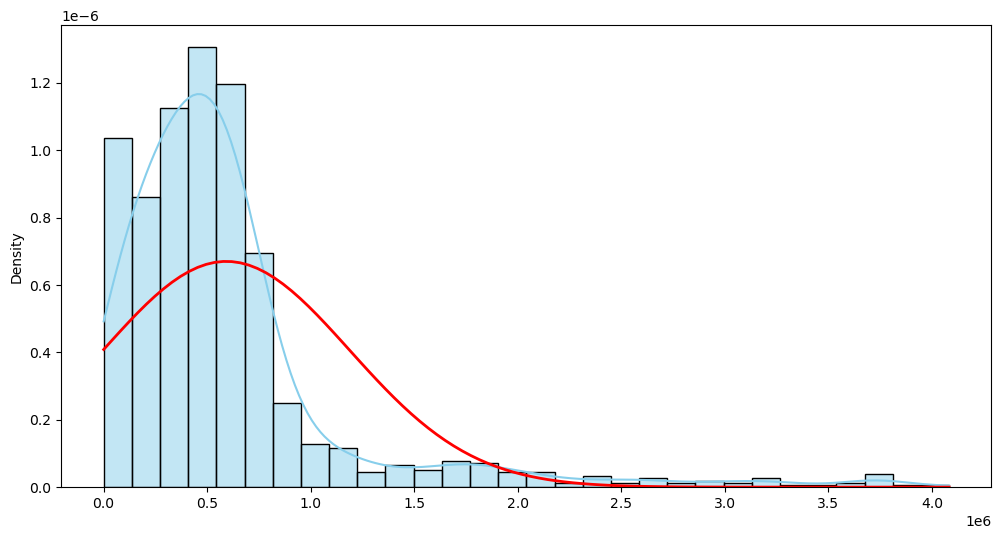

In [95]:
plt.figure(figsize=(12, 6))
sns.histplot(daily_new_case, bins=30, kde=True, stat='density', color='skyblue')
x = np.linspace(daily_new_case.min(), daily_new_case.max(), 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label=f'Fitted Normal fit\nμ = {mu:.0f}, σ = {std:.0f}')

# INTERPETATION: The normal distribution does not have a good fit for the data.

# 4. Compute the monthly growth rate of confirmed cases (e.g., (Feb–Jan)/Jan) for India from January to December 2022 in time_series_covid19_confirmed_global.csv. Fit a normal distribution to these growth rates and visualize using a Seaborn histogram with a fitted density curve.

In [98]:
#To separate India column only from the data set
india_data = df[df['Country/Region'] == 'India']
india_data

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,2/28/2023,3/1/2023,3/2/2023,3/3/2023,3/4/2023,3/5/2023,3/6/2023,3/7/2023,3/8/2023,3/9/2023
148,NaN,India,20.593684,78.96288,0,0,0,0,0,0,...,44687837,44688105,44688388,44688722,44689046,44689327,44689593,44689919,44690298,44690738


In [121]:
#to extract the date columns only
india_total = india_data.iloc[:, 4:].sum(axis=0)
india_total

1/22/2020           0
1/23/2020           0
1/24/2020           0
1/25/2020           0
1/26/2020           0
               ...   
3/5/2023     44689327
3/6/2023     44689593
3/7/2023     44689919
3/8/2023     44690298
3/9/2023     44690738
Length: 1143, dtype: int64

In [122]:
#to extract the date columns from 1/1/2022 to 31/12/2022
india_total.index = pd.to_datetime(india_total.index, format='mixed')
india_selected = india_total['2022-01-01':'2022-12-31']
india_selected

2022-01-01    34889132
2022-01-02    34922882
2022-01-03    34960261
2022-01-04    35018358
2022-01-05    35109286
                ...   
2022-12-27    44678871
2022-12-28    44679139
2022-12-29    44679382
2022-12-30    44679608
2022-12-31    44679873
Length: 365, dtype: int64

In [123]:
monthly_totals = india_selected.resample('M').last()

C:\Users\mccmrfcs\AppData\Local\Temp\ipykernel_4048\1030243027.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_totals = india_selected.resample('M').last()


In [124]:
monthly_growth_rate = monthly_totals.pct_change().dropna()

In [125]:
mu_1, sig_1 = norm.fit(monthly_growth_rate)

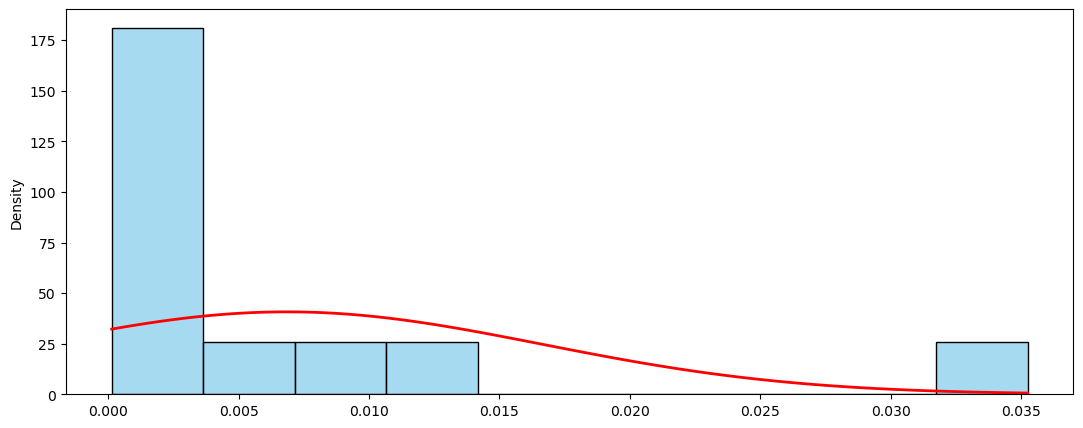

In [120]:
plt.figure(figsize=(13, 5))
sns.histplot(monthly_growth_rate, bins=10, kde=False, stat='density', color='skyblue', label='India Daily Increases Histogram')
x = np.linspace(monthly_growth_rate.min(), monthly_growth_rate.max(), 100)
p = norm.pdf(x, mu_1, sig_1)
plt.plot(x, p, 'r', linewidth=2, label=f'Fitted Normal Curve mu = {mu:.2f}, sig= {std:.2f}')

# 5. Calculate the probability that the growth rate exceeds 0.1 (10%). Compute the mean and standard deviation of growth rates

In [126]:
growth_mean = monthly_growth_rate.mean()
growth_std = monthly_growth_rate.std()

In [127]:
prob_exceeds_10_percent = 1 - norm.cdf(0.1, loc=growth_mean, scale=growth_std)

In [128]:
print(f"Mean Monthly Growth Rate: {growth_mean:.4f}")
print(f"Standard Deviation: {growth_std:.4f}")
print(f"Probability Growth Rate > 10%: {prob_exceeds_10_percent:.4f}")

Mean Monthly Growth Rate: 0.0068
Standard Deviation: 0.0103
Probability Growth Rate > 10%: 0.0000



# 6. Calculate daily case increases for Brazil from January to March 2022. Assume these increases follow a discrete probability distribution based on binned ranges (e.g., 0–100,000, 100,000–200,000, etc.).

In [129]:
brazil_data = df[df['Country/Region'] == 'Brazil']
brazil_total = brazil_data.iloc[:, 4:].sum(axis=0)

In [130]:
brazil_total.index = pd.to_datetime(brazil_total.index)

In [132]:
brazil_q1_2022 = brazil_total['2022-01-01':'2022-03-31']
daily_increases = brazil_q1_2022.diff().dropna()

In [133]:
bins = [0, 100_000, 200_000, 300_000, 400_000, np.inf]
labels = ['0–100k', '100k–200k', '200k–300k', '300k–400k', '>400k']

In [134]:
binned = pd.cut(daily_increases, bins=bins, labels=labels, right=False)

prob_distribution = binned.value_counts(normalize=True).sort_index()

print("Discrete Probability Distribution (Brazil Jan–Mar 2022):")
print(prob_distribution)

Discrete Probability Distribution (Brazil Jan–Mar 2022):
0–100k       0.651685
100k–200k    0.269663
200k–300k    0.078652
300k–400k    0.000000
>400k        0.000000
Name: proportion, dtype: float64


C:\Users\mccmrfcs\AppData\Local\Temp\ipykernel_4048\2391049057.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prob_distribution.index, y=prob_distribution.values, palette='Blues_d')


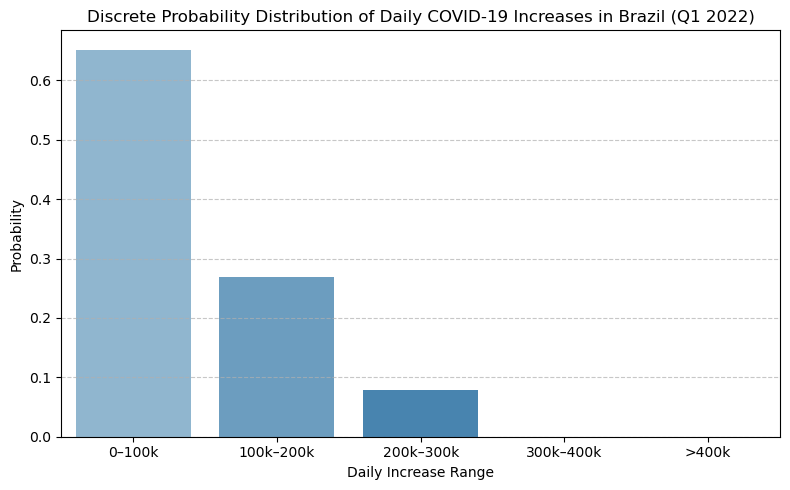

In [135]:
plt.figure(figsize=(8, 5))
sns.barplot(x=prob_distribution.index, y=prob_distribution.values, palette='Blues_d')
plt.title("Discrete Probability Distribution of Daily COVID-19 Increases in Brazil (Q1 2022)")
plt.xlabel("Daily Increase Range")
plt.ylabel("Probability")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 7. Use a Seaborn count plot to visualize the distribution of binned increases. Compute the empirical probability of a daily increase exceeding 200,000 cases.

In [137]:
binned_increases = pd.cut(daily_increases, bins=bins, labels=labels, right=False)

C:\Users\mccmrfcs\AppData\Local\Temp\ipykernel_4048\1371484460.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=binned_increases, order=labels, palette='coolwarm')


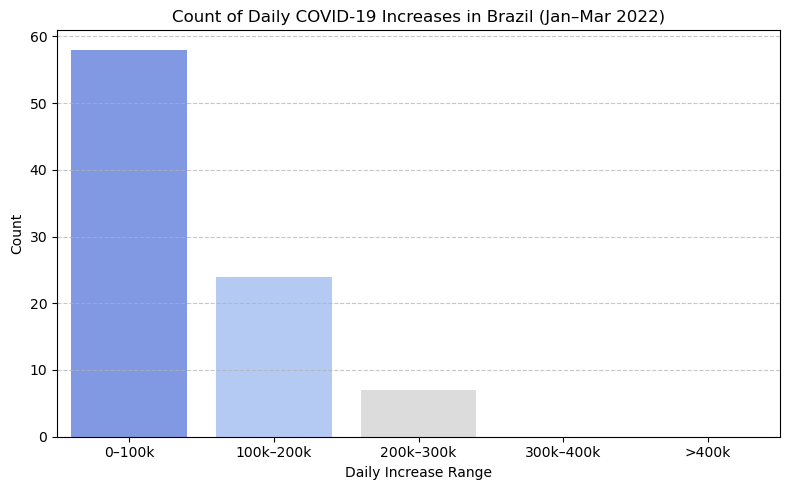

In [138]:
plt.figure(figsize=(8, 5))
sns.countplot(x=binned_increases, order=labels, palette='coolwarm')
plt.title('Count of Daily COVID-19 Increases in Brazil (Jan–Mar 2022)')
plt.xlabel('Daily Increase Range')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [139]:
exceeding_200k = daily_increases[daily_increases > 200_000]
empirical_prob_over_200k = len(exceeding_200k) / len(daily_increases)

print(f"Empirical Probability of >200,000 daily cases: {empirical_prob_over_200k:.4f}")

Empirical Probability of >200,000 daily cases: 0.0787


# 8. What does the probability suggest about Brazil’s epidemic severity?

In your previous analysis, the empirical probability that Brazil experienced daily increases exceeding 200,000 cases during January to March 2022 was:
7.87%

# 9. Compute the daily case volatility (standard deviation of daily increases over a 7-day rolling window) for Germany from January to March 2022.

In [141]:
germany_data = df[df['Country/Region'] == 'Germany']
germany_total = germany_data.iloc[:, 4:].sum(axis=0)

In [145]:
germany_total.index = pd.to_datetime(germany_total.index)
germany_q1_2022 = germany_total['2022-01-01':'2022-03-31']

In [146]:
daily_increases = germany_q1_2022.diff().dropna()

volatility_7d = daily_increases.rolling(window=7).std().dropna()

In [147]:
print("7-Day Rolling Volatility of Daily Increases (Germany, Jan–Mar 2022):")
print(volatility_7d.head())

7-Day Rolling Volatility of Daily Increases (Germany, Jan–Mar 2022):
2022-01-08    48061.787005
2022-01-09    48061.787005
2022-01-10    50577.443294
2022-01-11    40660.099157
2022-01-12    42314.455373
dtype: float64
